# Assignment 1
- s113604 Mark Ian Svenningsen
- s113627 Casper Clemmensen
- s146893 Kasper Hoa Quoc Duong

## Assignment 1A: Anscombe's quartet

### Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset.

We start out by downloading the data `data` to memory. Afterwards we transform the data `data_t` to a more appropriate format we can work with in Python. 

In [65]:
import urllib2
import numpy as np

# Downloads data given a url using urllib2
def getTsv(url):
    req = urllib2.Request(url)
    response = urllib2.urlopen(req)
    return response.read()

# Transforms the input data from a tabular seperated 
# file and casts the values to floats.
def transform(data):
    return np.array([[float(x) for x in line.split('\t')] for line in data.split('\n')])
    

data = [
    getTsv('https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data1.tsv'),
    getTsv('https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data2.tsv'),
    getTsv('https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data3.tsv'),
    getTsv('https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data4.tsv')
    ]

data_t = [transform(d) for d in data]

`data_t` now represents 4 lists containing a list of two elements (x,y) for each row of the tsv files.

Next, we calculate all the mean values. We use numpy as it has an easy way to calculate the mean of values in a numpy array. More specifically we can call a function on each of the four lists getting the mean across indexes. 

See the documentation [here](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.mean.html) for more details.

In [66]:
import numpy as np

# Calculates the mean values of a lists sublists/tuples 
# on the axis 0, i.e. up/down (axis=1, right,left)

means = [dt.mean(axis=0) for dt in data_t]

### Use python string formatting to print precisely two decimal places of these results to the output cell. Check out this stackoverflow page for help with the string formatting.

In [67]:
for m in means:
    print "Mean: {:10.2f},{:10.2f}".format(*m)

Mean:       9.00,      7.50
Mean:       9.00,      7.50
Mean:       9.00,      7.50
Mean:       9.00,      7.50


### Now calculate the variance for all of the various sets of x- and y-values (to three decimal places).

As we did with the means we can calculate the variance in x- and y-values the same way for each dataset.

In [68]:
variance = [dt.var(axis=0) for dt in data_t]

for v in variance:
    print "Variance: {:10.3f},{:10.3f}".format(*v)

Variance:     10.000,     3.752
Variance:     10.000,     3.752
Variance:     10.000,     3.748
Variance:     10.000,     3.748


### Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).

As before we use a list comprehension on the transformed data `data_t` calling a simple function that calculates the pearson correlation on each of the 4 datasets.

In [69]:
# Calculates the pearson correlation for 
# each dataset
def calc_pearson(data):
    data_xs = data[:,0] # all xs across sublists/tuples
    data_ys = data[:,1] # all xs across sublists/tuples
    return np.corrcoef(data_xs, data_ys)[0][1]
    
pears = [calc_pearson(x) for x in data_t]

for pear in pears:
    print "Pearson: {:10.3f}".format(pear)

Pearson:      0.816
Pearson:      0.816
Pearson:      0.816
Pearson:      0.817


### The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`.

Before we start plotting, lets first generate the straigt lines needed for each dataset.

Because we use a single list comprehension for all datasets we return a dictionary from `lin_reg()` for easy lookup later on.

In [70]:
from scipy import stats

# Calculates the linear regression for each dataset
# and returns a dictionary containing lin reg values
def lin_reg(data):
    data_xs = data[:,0]
    data_ys = data[:,1]
    slope, intercept, r_value, p_value, std_err = stats.linregress(data_xs,data_ys)
    
    return {'slope': slope, 'intercept': intercept, 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}

lin_regs = [lin_reg(x) for x in data_t]

### Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/anscombe.png).)

Now that the regressions have been calculated, a plot for each dataset can be made.

Because the datasets are kept in a single list we can use a `for loop` to generate each subplot.

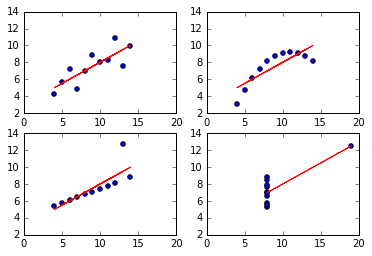

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(0, len(data_t)):
    d = data_t[i] # Get the individual dataset
    xs = d[:,0]
    ys = d[:,1]
    predict_y = lin_regs[i]["intercept"] + lin_regs[i]["slope"] * xs # Straigt line function

    plt.subplot(221+i) # 2 rows, 2 columns, current plot + i (starts at zero)
    plt.scatter(xs,ys)
    plt.plot(xs,predict_y, 'r')
    plt.xlim(xmin=0, xmax=20) # Standadize x axis min
    plt.ylim(ymin=2, ymax=14) # Standadize y axis min
    
plt.show()

### Explain - in your own words - what you think my point with this exercise is.

Other than learning how to, extract and transform data, use numpy and matlibplot, we think it is fair to say that up until the plotting the data looks very similiar. And indeed they do on the mean, variance, pearson correlation which we have calculated.

However, looking at the data plots it is easy to see how different each dataset really is. Visualization is a really important factor to help understand your data better.

## Assignment 1B: Slicing data|

## Assignment 1C: KNN

## Assignment 1D: Multiple regression and the Red Baron